In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random, math, time
from PIL import Image as image

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

def panel(images, gspec, **kargs):
	M, N = gspec

	x, y = (1024, 512) if 'dims' not in kargs else kargs['dims']
	dpi = 72 if 'dpi' not in kargs else kargs['dpi']
	texts = [] if 'texts' not in kargs else kargs['texts']
	tx, ty = (10, 10) if 'text_pos' not in kargs else kargs['text_pos']
	tc = 'white' if 'text_color' not in kargs else kargs['text_color']
	ts = 12 if 'text_size' not in kargs else kargs['text_size']
	interval = [0, 255] if 'interval' not in kargs else kargs['interval']

	fig = plt.figure(figsize=(x/dpi, y/dpi))
	gs = gridspec.GridSpec(N, M)
	gs.update(	left=0, right=1,
                bottom=0, top=1,
                wspace=0, hspace=0)
	images = (images - interval[0])/(interval[1] - interval[0])
	images[images < 0] = 0
	images[images > 1] = 1
	for n in range(N):
		for m in range(M):
			ax = plt.subplot(gs[n, m])
			ax.axis('off')
			try:
				image = images[n*M + m]
			except:
				image = images[0]*0
			if image.ndim == 2:
				ax.imshow(image, cmap='gray')
			else:
				ax.imshow(image)
			try:
				texto = texts[n*M + m]
			except:
				texto = ''
			ax.text(	tx, ty, texto,
						color=tc, size=ts,
						horizontalalignment='left',
						verticalalignment='top')
	plt.show()

Diagram defined by euclidean distance which term is the L2 norm:

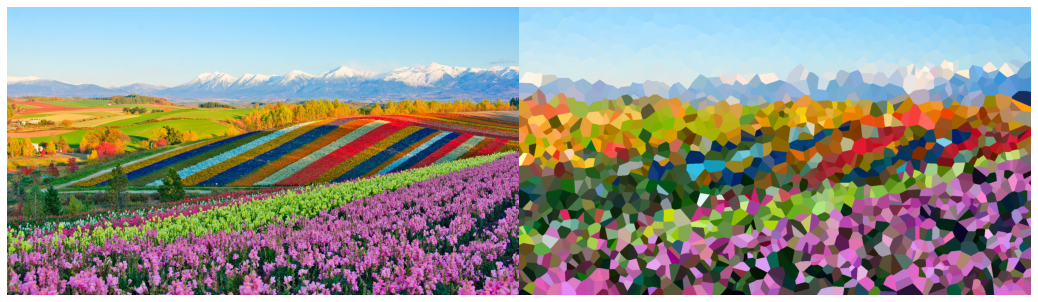

CPU times: user 1min 32s, sys: 134 ms, total: 1min 33s
Wall time: 1min 33s


In [5]:
%%time
# parameters
n = 2048       # number of points c
sb = 4         # space between slices
BG = (0, 0, 0) # background color

# init
img = image.open('./shikisai-no-oka hill biei furano basin hokkaido.jpg')
imx = img.size[0]
imy = img.size[1]
imgIn = image.new('RGB', img.size)
imgIn.paste(img)
imgOut = image.new('RGB', img.size, BG)

# execution
cx = np.random.randint(0, imx, n)
cy = np.random.randint(0, imy, n)
pop = np.array([cx, cy]).T

for y in range(imy):
    for x in range(imx):
        d = np.sum(((x, y) - pop)**2, axis=1)**0.5
        NP = pop[np.argmin(d)]
        cd = imgIn.getpixel((int(NP[0]), int(NP[1])))
        imgOut.putpixel((x, y), cd)

output = np.array([np.asarray(imgIn),
                   np.asarray(imgOut)])
panel(output, (2, 1))

Diagram defined by manhattan distance (or Taxicab geometry) which term is the L1 norm:

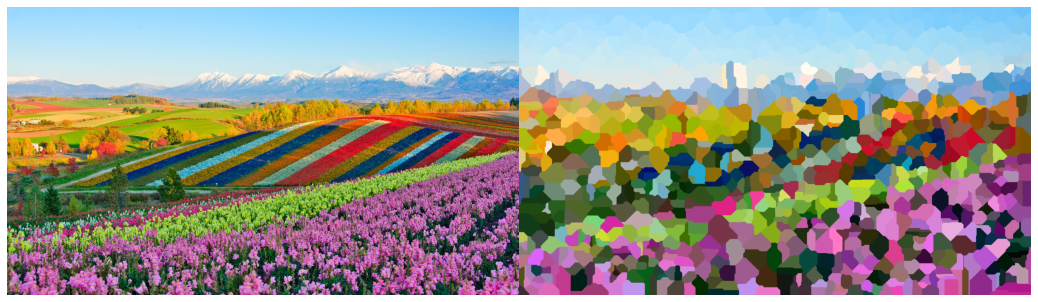

CPU times: user 29.8 s, sys: 140 ms, total: 29.9 s
Wall time: 29.9 s


In [6]:
%%time
# parâmetros
n = 1024       # number of points c
sb = 4         # space between slices
BG = (0, 0, 0) # background color

# init
img = image.open('./shikisai-no-oka hill biei furano basin hokkaido.jpg')
imx = img.size[0]
imy = img.size[1]
imgIn = image.new('RGB', img.size)
imgIn.paste(img)
imgOut = image.new('RGB', img.size, BG)

# execution
cx = np.random.randint(0, imx, n)
cy = np.random.randint(0, imy, n)
pop = np.array([cx, cy]).T

for y in range(imy):
    for x in range(imx):
        d = np.sum(abs((x, y) - pop), axis=1)
        NP = pop[np.argmin(d)]
        cd = imgIn.getpixel((int(NP[0]), int(NP[1])))
        imgOut.putpixel((x, y), cd)

output = np.array([np.asarray(imgIn),
                   np.asarray(imgOut)])
panel(output, (2, 1))

Diagram defined by chebyshev distance which term is the L∞ norm:

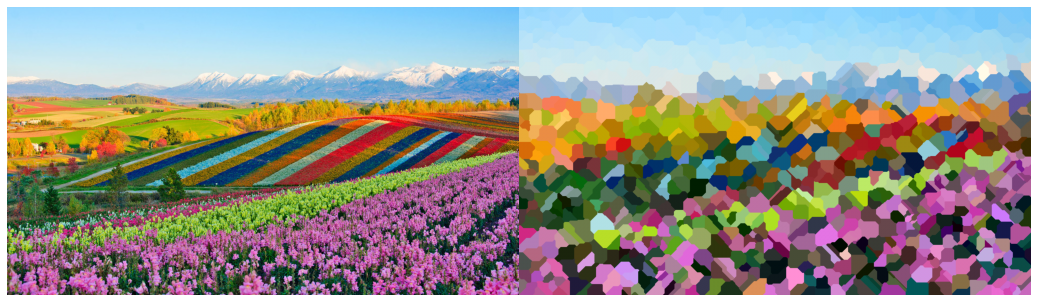

CPU times: user 28.1 s, sys: 116 ms, total: 28.3 s
Wall time: 28.3 s


In [7]:
%%time
# parameters
n = 1024       # number of points c
sb = 4         # space between slices
BG = (0, 0, 0) # background color

# init
img = image.open('./shikisai-no-oka hill biei furano basin hokkaido.jpg')
imx = img.size[0]
imy = img.size[1]
imgIn = image.new('RGB', img.size)
imgIn.paste(img)
imgOut = image.new('RGB', img.size, BG)

# execution
cx = np.random.randint(0, imx, n)
cy = np.random.randint(0, imy, n)
pop = np.array([cx, cy]).T

for y in range(imy):
    for x in range(imx):
        d = abs((x, y) - pop).max(axis=1)
        NP = pop[np.argmin(d)]
        cd = imgIn.getpixel((int(NP[0]), int(NP[1])))
        imgOut.putpixel((x, y), cd)

output = np.array([np.asarray(imgIn),
                   np.asarray(imgOut)])
panel(output, (2, 1))